In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0,0.5,'Magnitud')

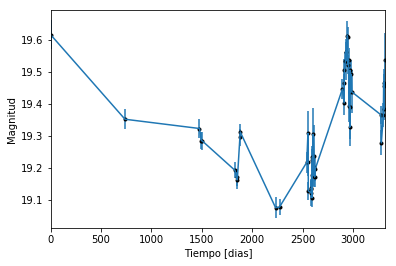

In [2]:
data = np.genfromtxt('LC_23343_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

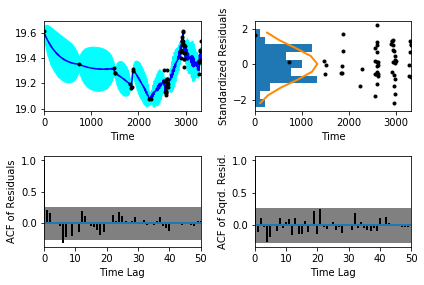

In [5]:
sample.assess_fit()

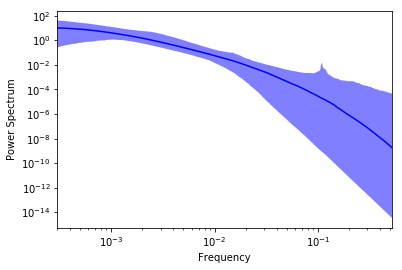

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000376389,0.159885,'Medida del nivel de ruido')

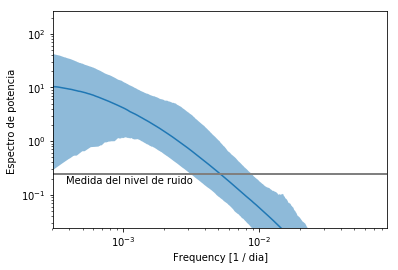

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

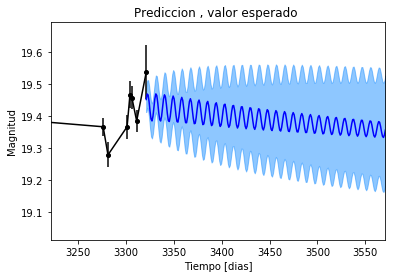

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


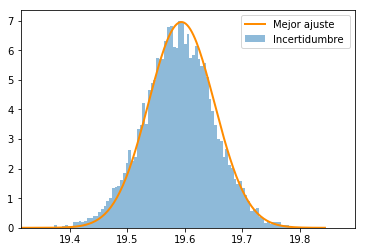

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

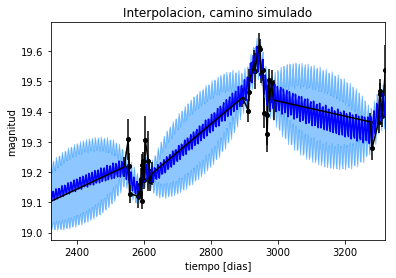

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

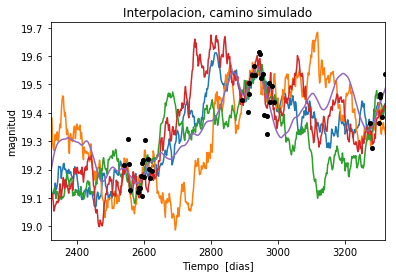

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 853.318595319
Median: 0.0233160901742
Standard deviation: 0.208127084026
68% credibility interval: [ 0.00209989  0.22615255]
95% credibility interval: [  4.13154015e-04   8.27129654e-01]
99% credibility interval: [  3.31954713e-04   9.98745460e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 721.531450937
Median: 0.0076887686813
Standard deviation: 0.112129088633
68% credibility interval: [ 0.00073285  0.07207132]
95% credibility interval: [  3.35172713e-04   4.17756129e-01]
99% credibility interval: [  3.15964704e-04   7.62949028e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 604.236670378
Median: 0.0585079899147
S

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 616.267720154
Median: 85.5219771552
Standard deviation: 1.87950702776
68% credibility interval: [ 83.5569136  86.8171989]
95% credibility interval: [ 80.853686    88.28387562]
99% credibility interval: [ 78.59622791  90.3536285 ]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 508.769212264
Median: 1.24410301871
Standard deviation: 2.43971162225
68% credibility interval: [ 0.18123582  4.78037109]
95% credibility interval: [ 0.04506221  8.38036994]
99% credibility interval: [  0.02006361  11.7000841 ]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 578.527139894
Median: 1.26585074078
Standard deviation: 10.8140776749
68% credibility interval: [  0.06786132  12.40203209]
95% credibility interval: [  7.50837018e

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 10556.7505442
Median: 7.9872011432e-39
Standard deviation: 8.88325392807e+105
68% credibility interval: [  8.66123032e-89   7.39047005e+00]
95% credibility interval: [  1.81657585e-207   1.43210168e+074]
99% credibility interval: [  3.13434069e-219   5.14470616e+096]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1738.19709139
Median: 19.3345356346
Standard deviation: 0.0788502278498
68% credibility interval: [ 19.27380727  19.4125521 ]
95% credibility interval: [ 19.20258084  19.51576665]
99% credibility interval: [ 19.12406218  19.60084444]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 439.286372769
Median: 0.0510215393438
Standard deviation: 0.259628091828
68% credibility interval: [ 0.          0.43681101]
95% credibility interval: [ 0.          0.93271259]
99% credibility interval: [ 0.          1.02489795]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 439.286372769
Median: 0.0510215393438
Standard deviation: 0.259628091828
68% credibility interval: [ 0.          0.43681101]
95% credibility interval: [ 0.          0.93271259]
99% credibility interval: [ 0.          1.02489795]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1020.09069984
Median: 0.0
Standard deviation: 0.000615555431151
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 616.267720154
Median: 85.5219771552
Standard deviation: 1.87950702776
68% credibility interval: [ 83.5569136  86.8171989]
95% credibility interval: [ 80.853686    88.28387562]
99% credibility interval: [ 78.59622791  90.3536285 ]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1712.28015547
Median: 0.0296868582559
Standard deviation: 0.0203217846244
68% credibility interval: [ 0.01881707  0.04935982]
95% credibility interval: [ 0.01253     0.08630382]
99% credibility interval: [ 0.009751    0.12102075]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2105.91738693
Median: 1.1882577363
Standard deviation: 0.212090187908
68% credibility interval: [ 1.00086881  1.41491123]
95% credibility interval: [ 0.83835226  1.68021853]
99% credibility interval: [ 0.75255567  1.8651322 ]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 549.87064182
Median: 0.00193219004926
Standard deviation: 0.266114322715
68% credibility interval: [  1.90020010e-06   5.15919486e-02]
95% credibility interval: [  7.09609141e-78   5.77751507e-01]
99% credibility interval: [  2.89773047e-99   1.75264586e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 853.318595319
Median: (-0.146499315203-0.17633274154j)
Standard deviation: 2.0907399817
68% credibility interval: [-1.42095841-4.20022233j -0.01319401-0.09143062j]
95% credibility interval: [ -5.19700889e+00+0.j          -2.59592324e-03-0.69785364j]
99% credibility interval: [ -6.27530280e+00+0.j          -2.08573298e-03-0.68285747j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 721.531450937
Median: (-0.0483099584086+0.25894843827j)
Standard deviation: 1.77692744675
68% credibility interval: [-0.45283744+0.j         -0.00460466+0.05103789j]
95% credibility interval: [ -2.62483917e+00+4.54361845j  -2.10595227e-03+0.j        ]
99% credibility interval: [ -4.79375012e+00+1.6353153j  -1.98526478e-03+0.j       ]
Posterio